# Attribute Information:
age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/data/heart.csv')
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [67]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Распределение классов в target:
target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


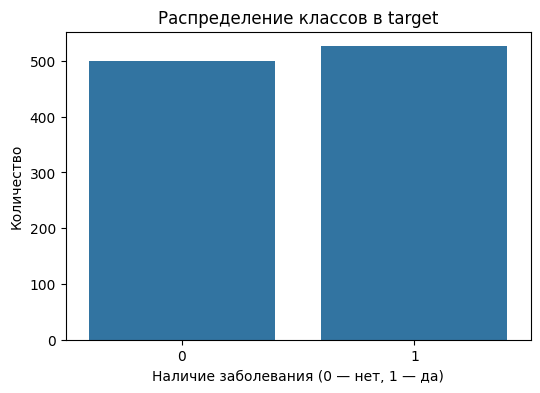

In [68]:
print("Распределение классов в target:")
print(data['target'].value_counts(normalize=True))

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title('Распределение классов в target')
plt.xlabel('Наличие заболевания (0 — нет, 1 — да)')
plt.ylabel('Количество')
plt.show()

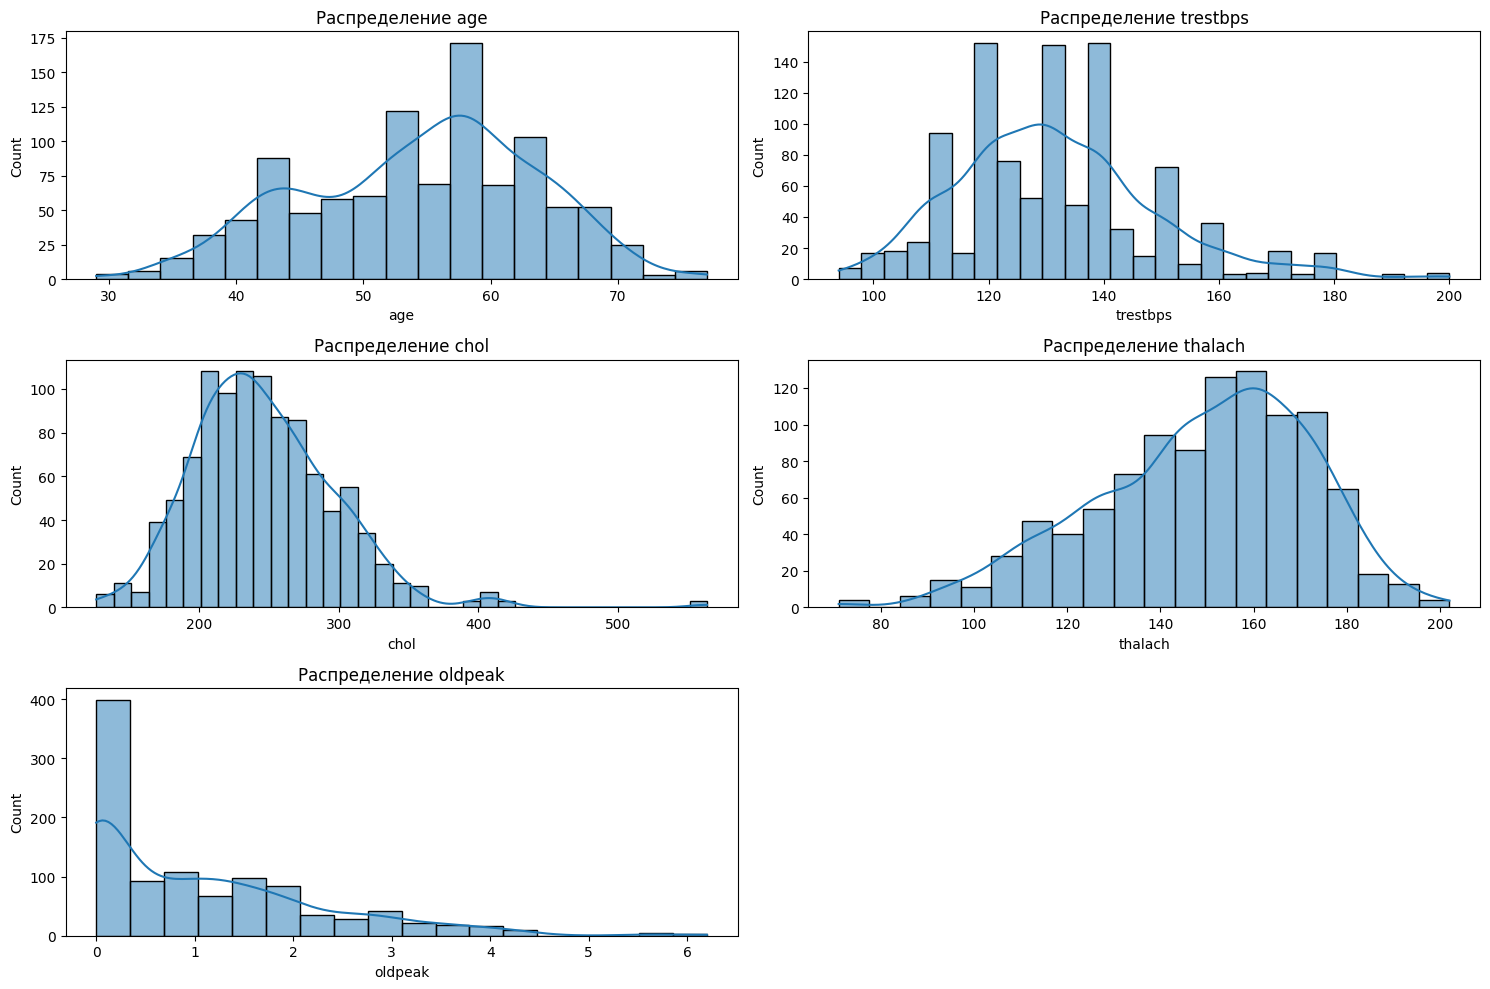

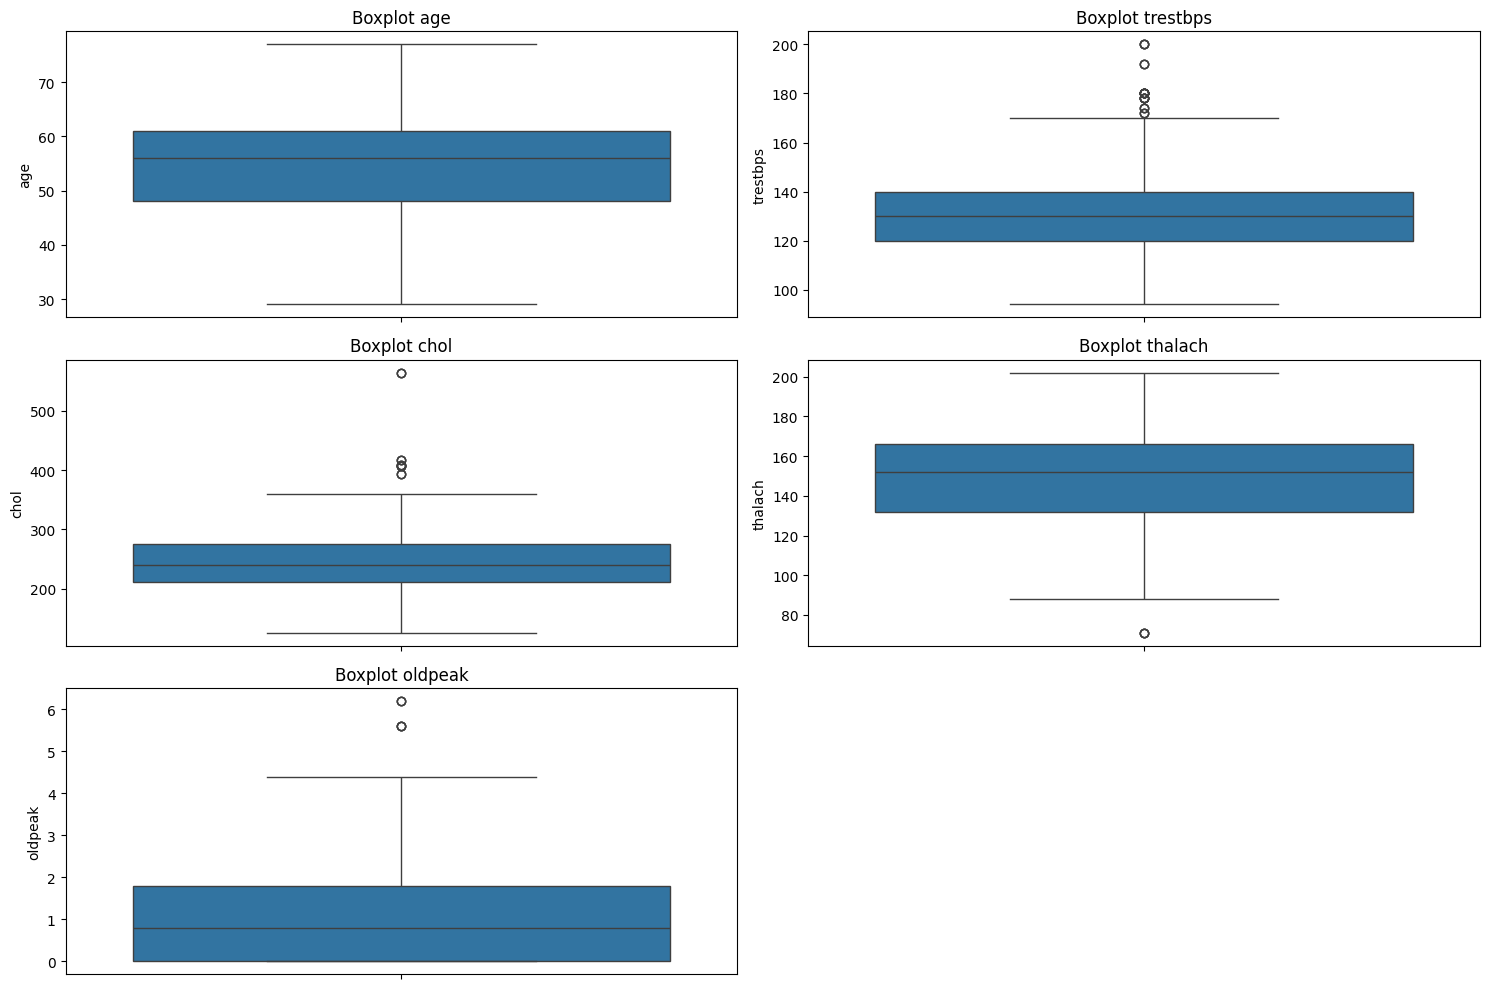

In [69]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Распределение {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot {feature}')
plt.tight_layout()
plt.show()

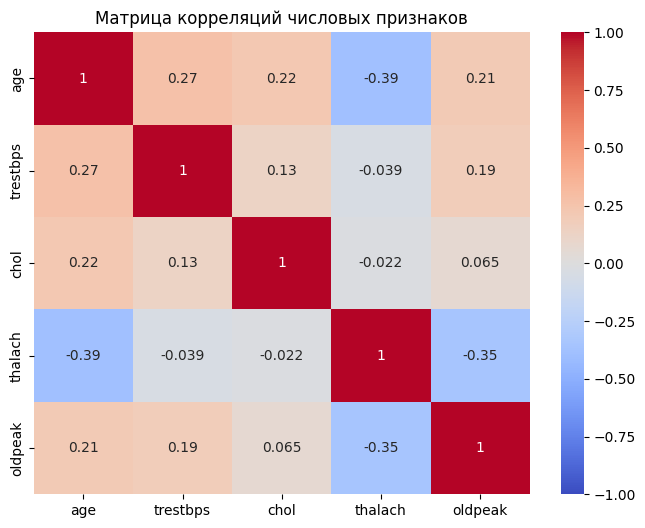

In [70]:
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляций числовых признаков')
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, recall_score, average_precision_score,
    accuracy_score, precision_score, f1_score, confusion_matrix
)
from sklearn.metrics import precision_recall_curve


y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)[:, 1]
lr_acc_score = accuracy_score(y_test, lr_predicted)
lr_roc_auc = roc_auc_score(y_test, lr_prob)
lr_recall = recall_score(y_test, lr_predicted)
lr_pr_auc = average_precision_score(y_test, lr_prob)

print("Logistic Regression:")
print(f"ROC-AUC: {lr_roc_auc:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"PR-AUC: {lr_pr_auc:.2f}")

Logistic Regression:
ROC-AUC: 0.91
Recall: 0.80
PR-AUC: 0.92


In [73]:
svm = LinearSVC(C=1, random_state=42)
svm.fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
svm_decision = svm.decision_function(X_test)

svm_acc_score = accuracy_score(y_test, svm_predicted)
svm_roc_auc = roc_auc_score(y_test, svm_decision)
svm_recall = recall_score(y_test, svm_predicted)
svm_pr_auc = average_precision_score(y_test, svm_decision)

print("Linear SVM:")
print(f"ROC-AUC: {svm_roc_auc:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"PR-AUC: {svm_pr_auc:.2f}")

Linear SVM:
ROC-AUC: 0.91
Recall: 0.80
PR-AUC: 0.92


In [74]:
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]
rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_roc_auc = roc_auc_score(y_test, rf_prob)
rf_recall = recall_score(y_test, rf_predicted)
rf_pr_auc = average_precision_score(y_test, rf_prob)

print("Random Forest:")
print(f"ROC-AUC: {rf_roc_auc:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"PR-AUC: {rf_pr_auc:.2f}")

Random Forest:
ROC-AUC: 0.97
Recall: 0.90
PR-AUC: 0.97


In [80]:
target_recall = 0.90

prec, rec, thr = precision_recall_curve(y_test, rf_prob)

thr = np.append(thr, 1.0)

mask = rec >= target_recall
best_thr = float(thr[mask][-1]) if mask.any() else 0.5

rf_pred_thr = (rf_prob >= best_thr).astype(int)

print("Chosen threshold for RF:", round(best_thr, 4))
print("RF tuned metrics:")
print("Recall   :", round(recall_score(y_test, rf_pred_thr), 3))
print("Precision:", round(precision_score(y_test, rf_pred_thr), 3))
print("F1       :", round(f1_score(y_test, rf_pred_thr), 3))
print("Confusion matrix:\n", confusion_matrix(y_test, rf_pred_thr))


Chosen threshold for RF: 0.56
RF tuned metrics:
Recall   : 0.905
Precision: 0.922
F1       : 0.913
Confusion matrix:
 [[92  8]
 [10 95]]


In [76]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:, 1]
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
xgb_roc_auc = roc_auc_score(y_test, xgb_prob)
xgb_recall = recall_score(y_test, xgb_predicted)
xgb_pr_auc = average_precision_score(y_test, xgb_prob)

print("XGBoost:")
print(f"ROC-AUC: {xgb_roc_auc:.2f}")
print(f"Recall: {xgb_recall:.2f}")
print(f"PR-AUC: {xgb_pr_auc:.2f}")


XGBoost:
ROC-AUC: 0.95
Recall: 0.94
PR-AUC: 0.95


In [77]:
lr_precision = precision_score(y_test, lr_predicted)
lr_f1 = f1_score(y_test, lr_predicted)

rf_precision = precision_score(y_test, rf_predicted)
rf_f1 = f1_score(y_test, rf_predicted)

xgb_precision = precision_score(y_test, xgb_predicted)
xgb_f1 = f1_score(y_test, xgb_predicted)

svm_precision = precision_score(y_test, svm_predicted)
svm_f1 = f1_score(y_test, svm_predicted)

model_ev = pd.DataFrame([
    {"Model": "Logistic Regression", "Accuracy": lr_acc_score, "Recall": lr_recall, "Precision": lr_precision, "F1": lr_f1, "ROC_AUC": lr_roc_auc, "PR_AUC": lr_pr_auc},
    {"Model": "Random Forest",       "Accuracy": rf_acc_score, "Recall": rf_recall, "Precision": rf_precision, "F1": rf_f1, "ROC_AUC": rf_roc_auc, "PR_AUC": rf_pr_auc},
    {"Model": "XGBoost",             "Accuracy": xgb_acc_score,"Recall": xgb_recall,"Precision": xgb_precision,"F1": xgb_f1,"ROC_AUC": xgb_roc_auc,"PR_AUC": xgb_pr_auc},
    {"Model": "Linear SVM",          "Accuracy": svm_acc_score,"Recall": svm_recall,"Precision": svm_precision,"F1": svm_f1,"ROC_AUC": svm_roc_auc,"PR_AUC": svm_pr_auc},
]).sort_values("ROC_AUC", ascending=False)

model_ev = pd.concat([model_ev, pd.DataFrame([{
    "Model": "Random Forest (tuned thr)",
    "Accuracy": accuracy_score(y_test, rf_pred_thr),
    "Recall": recall_score(y_test, rf_pred_thr),
    "Precision": precision_score(y_test, rf_pred_thr),
    "F1": f1_score(y_test, rf_pred_thr),
    "ROC_AUC": rf_roc_auc,
    "PR_AUC": rf_pr_auc
}])], ignore_index=True)

model_ev = model_ev.sort_values("ROC_AUC", ascending=False)

model_ev.round(4)

,Model,Accuracy,Recall,Precision,F1,ROC_AUC,PR_AUC
0,Random Forest,0.8829,0.9048,0.8716,0.8879,0.9705,0.9750
4,Random Forest (tuned thr),0.9122,0.9048,0.9223,0.9135,0.9705,0.9750
1,XGBoost,0.9024,0.9429,0.8761,0.9083,0.9485,0.9537
2,Logistic Regression,0.8049,0.8000,0.8155,0.8077,0.9124,0.9186
3,Linear SVM,0.8098,0.8000,0.8235,0.8116,0.9117,0.9180


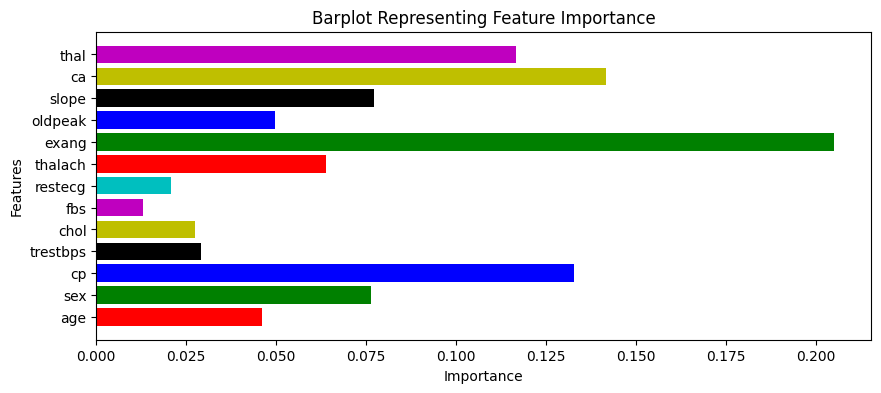

In [78]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})

colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c', 'r', 'g', 'b', 'k', 'y', 'm']

plt.figure(figsize=(10, 4))
plt.title("Barplot Representing Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors)
plt.show()

# **ВЫВОДЫ:**
1) лучшие метрики показал случайный лес

2) наиболее информативными признаками являются стенокардия и боль в груди

3) пропуск заболевания (FN) может привести к серьёзным последствиям, поэтому в модели/правиле принятия решения приоритет - высокий Recall. Ложные срабатывания (FP) обычно приводят к дополнительным проверкам и временным неудобствам что менее критично чем пропуск риска